In [5]:
import itertools as it
import venn
import pandas as pd

In [13]:
pd.read_csv("/data6/deepro/ukb_bmi/0_data_preparation_and_download/exome_annot/data/processed_burden/all_gene_burden.csv.gz", nrows=10).gene.to_list()

['A1BG',
 'A1CF',
 'A2M',
 'A2ML1',
 'A3GALT2',
 'A4GALT',
 'A4GNT',
 'AAAS',
 'AACS',
 'AADAC']

In [2]:
def read_genes(filename):
    with open(filename, "r") as f:
        genes = [g.strip() for g in f.readlines()]
    return set(genes)

In [3]:
gene_files = [
    "/data6/deepro/ukb_bmi/3_characterization/data/archive/enrichment/british/genes.list",
    "/data6/deepro/ukb_bmi/0_data_preparation_and_download/bmi_genes/gwas/data/gwas_genes.txt",
    "/data6/deepro/ukb_bmi/0_data_preparation_and_download/bmi_genes/mgi/data/mgi_genes.txt",
    "/data6/deepro/ukb_bmi/0_data_preparation_and_download/bmi_genes/marenne/data/marenne_genes.txt",
    "/data6/deepro/ukb_bmi/0_data_preparation_and_download/bmi_genes/locke/data/locke_genes.txt",
    "/data6/deepro/ukb_bmi/0_data_preparation_and_download/bmi_genes/akbari_2021/data/akbari_genes.list",
    "/data6/deepro/ukb_bmi/0_data_preparation_and_download/bmi_genes/turcot_2018/data/turcot_genes.list"
]

In [4]:
genes = list(map(read_genes, gene_files))

In [6]:
def get_genes_df(g, gl):
    df = pd.DataFrame(g, columns=["gene"])
    df["label"] = gl
    return df

genes_df = pd.concat([get_genes_df(g, gl) for g,gl in zip(genes, ["combo", "gwas", "mgi", "rvas", "rvas", "rvas", "rvas"])])


In [7]:
genes_dict = genes_df.groupby("label").agg({"gene": lambda x: set(x)}).to_dict()["gene"]

In [8]:
gene_labels, gene_sets = list(genes_dict.keys()), list(genes_dict.values())

In [9]:
subset_dict = dict()

def get_intersecting_num(gene_sets, prod):
    sign = [-1 if p==0 else 1 for p in prod]
    sign_dict = {idx: s for idx,s in zip(range(len(prod)), sign)}
    # get the positive signs first
    sign_dict = dict(sorted(sign_dict.items(), key=lambda item:item[1], reverse=True))
    for i, (k,v) in enumerate(sign_dict.items()):
        if i == 0:
            assert v==1
            final_set = gene_sets[k]
        else:
            if v==-1:
                final_set = final_set.difference(gene_sets[k])
            else:
                assert v==1
                final_set = final_set.intersection(gene_sets[k])
    return len(final_set)

for prod in list(it.product([0, 1], repeat=4)):
    if all(p == 0 for p in prod):
        continue
    else:
        subset_dict["".join(list(map(str, prod)))] = get_intersecting_num(gene_sets, prod)


/data6/deepro/miniconda3/envs/dnanexus/lib/python3.11/site-packages/venn/_backwards_compatibility.py:30: UserWarning: `venn4()` is retained for backwards compatibility; use `venn()` instead
  warn((


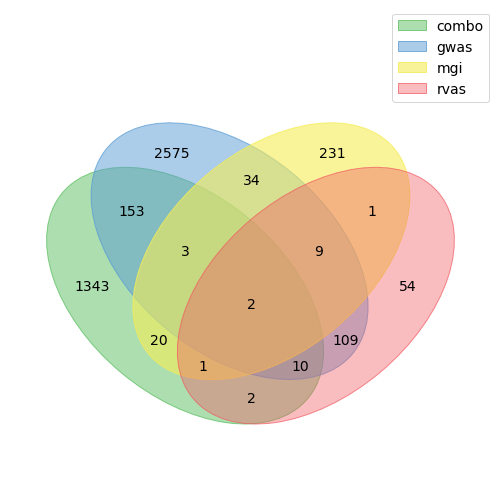

In [10]:
fig, ax = venn.venn4(subset_dict, names=gene_labels)
fig.show()

In [ ]:
combo_genes = genes[0]
gwas_genes = genes[1]
mgi_genes = genes[2]
other_studies = genes[3].union(genes[4]).union(genes[5]).union(genes[6])

In [7]:
subset_dict = dict()

def get_intersecting_num(gene_sets, prod):
    sign = [-1 if p==0 else 1 for p in prod]
    sign_dict = {idx: s for idx,s in zip(range(len(prod)), sign)}
    # get the positive signs first
    sign_dict = dict(sorted(sign_dict.items(), key=lambda item:item[1], reverse=True))
    for i, (k,v) in enumerate(sign_dict.items()):
        if i == 0:
            assert v==1
            final_set = gene_sets[k]
        else:
            if v==-1:
                final_set = final_set.difference(gene_sets[k])
            else:
                assert v==1
                final_set = final_set.intersection(gene_sets[k])
    return len(final_set)

for prod in list(it.product([0, 1], repeat=4)):
    if all(p == 0 for p in prod):
        continue
    else:
        subset_dict["".join(list(map(str, prod)))] = get_intersecting_num([combo_genes, gwas_genes, mgi_genes, other_studies], prod)


In [10]:
len(combo_genes) - 1343

191

/data6/deepro/miniconda3/envs/dnanexus/lib/python3.11/site-packages/venn/_backwards_compatibility.py:30: UserWarning: `venn4()` is retained for backwards compatibility; use `venn()` instead
  warn((


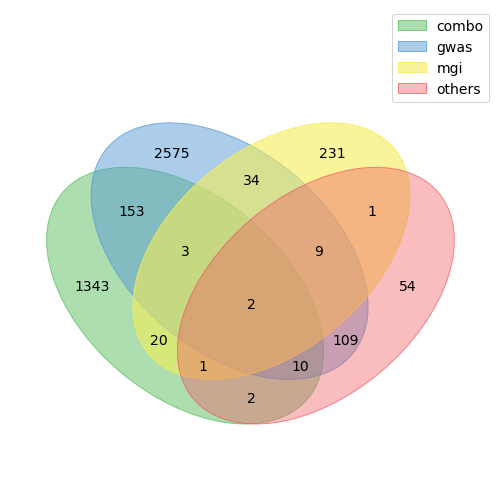

In [8]:
fig, ax = venn.venn4(subset_dict, names=["combo", "gwas", "mgi", "others"])
fig.show()

In [12]:
combo_genes.intersection(gwas_genes).intersection(mgi_genes).intersection(other_studies)

{'BBS4', 'BDNF'}

In [18]:
combo_genes.intersection(gwas_genes).intersection(mgi_genes)

{'BBS4', 'BDNF', 'CACNA1B', 'DMD', 'LRP1'}

In [19]:
combo_genes.intersection(gwas_genes).intersection(other_studies)

{'BBS4',
 'BDNF',
 'C1QTNF4',
 'GDF15',
 'HMGCR',
 'KSR2',
 'LRP1B',
 'NPC1',
 'RARB',
 'SEC16B',
 'SPARC',
 'UBR2'}